## *Лабораторная работа №6*

### *Оценка и улучшение качества модели*

### ****Задание 2****

#### **1. Загрузка и подготовка данных**

In [35]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Загружаем датасет Breast Cancer
data = load_breast_cancer()

# Преобразуем в DataFrame для удобства
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Просмотр первых строк данных
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

#### **2. Перекрёстная проверка (Cross-Validation)**
a) K-блочная перекрёстная проверка (KFold)

Средняя точность K-блочной перекрёстной проверки: 0.96


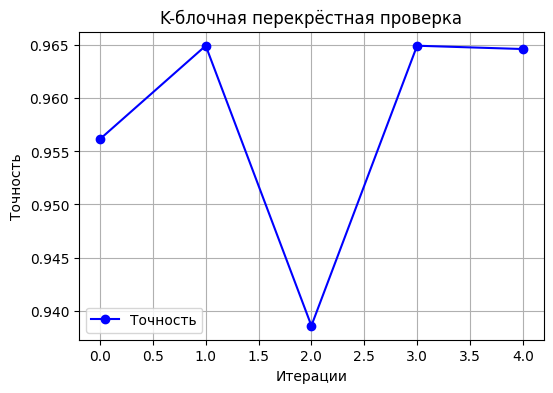

In [48]:
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Определение модели
model = RandomForestClassifier(random_state=42)

# K-блочная перекрёстная проверка
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Оценка модели
cv_scores = cross_val_score(model, data.data, data.target, cv=kf, scoring='accuracy')

# Средняя точность
print(f"Средняя точность K-блочной перекрёстной проверки: {cv_scores.mean():.2f}")

# График точности
plt.figure(figsize=(6, 4))
plt.plot(cv_scores, marker='o', linestyle='-', color='b', label='Точность')
plt.title("K-блочная перекрёстная проверка")
plt.xlabel("Итерации")
plt.ylabel("Точность")
plt.grid(True)
plt.legend()
plt.show()

b) Стратифицированная k-блочная перекрёстная проверка (StratifiedKFold)

Средняя точность стратифицированной k-блочной перекрёстной проверки: 0.96


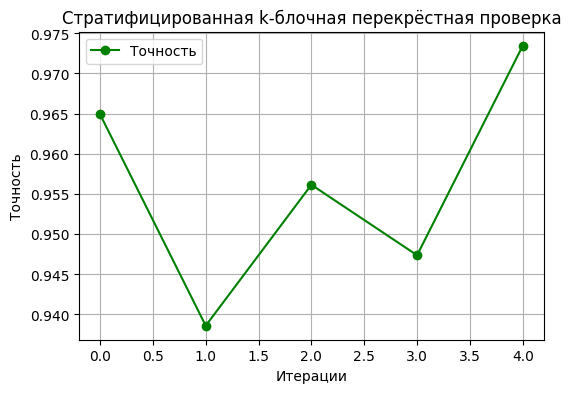

In [49]:
from sklearn.model_selection import StratifiedKFold

# Стратифицированная k-блочная перекрёстная проверка
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Оценка модели
cv_scores_stratified = cross_val_score(model, data.data, data.target, cv=skf, scoring='accuracy')

# Средняя точность
print(f"Средняя точность стратифицированной k-блочной перекрёстной проверки: {cv_scores_stratified.mean():.2f}")

# График точности
plt.figure(figsize=(6, 4))
plt.plot(cv_scores_stratified, marker='o', linestyle='-', color='g', label='Точность')
plt.title("Стратифицированная k-блочная перекрёстная проверка")
plt.xlabel("Итерации")
plt.ylabel("Точность")
plt.grid(True)
plt.legend()
plt.show()

c) Перекрёстная проверка с исключением по одному (Leave-One-Out)

Средняя точность с исключением по одному: 0.96


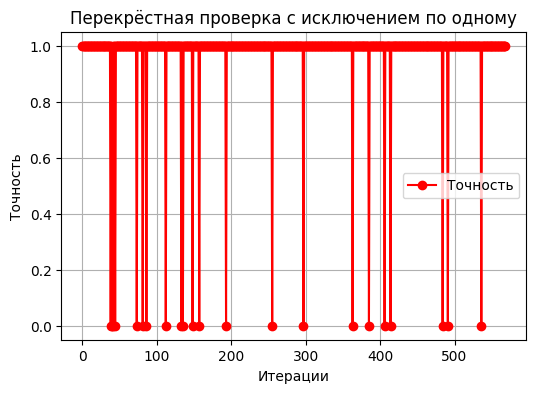

In [50]:
from sklearn.model_selection import LeaveOneOut

# Перекрёстная проверка с исключением по одному
loo = LeaveOneOut()

# Оценка модели
cv_scores_loo = cross_val_score(model, data.data, data.target, cv=loo, scoring='accuracy')

# Средняя точность
print(f"Средняя точность с исключением по одному: {cv_scores_loo.mean():.2f}")

# График точности
plt.figure(figsize=(6, 4))
plt.plot(cv_scores_loo, marker='o', linestyle='-', color='r', label='Точность')
plt.title("Перекрёстная проверка с исключением по одному")
plt.xlabel("Итерации")
plt.ylabel("Точность")
plt.grid(True)
plt.legend()
plt.show()

d) Случайные перестановки (Shuffle-Split)

Средняя точность с случайными перестановками: 0.97


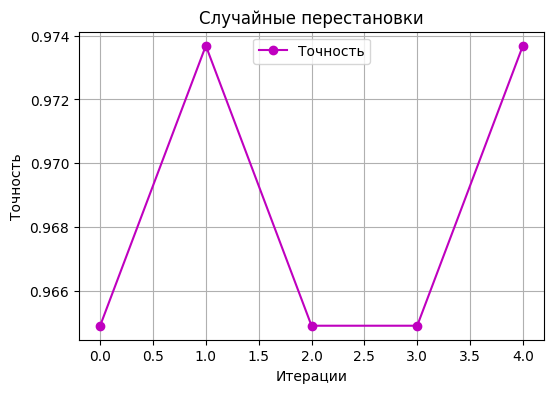

In [51]:
from sklearn.model_selection import ShuffleSplit

# Случайные перестановки
ss = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

# Оценка модели
cv_scores_shuffle = cross_val_score(model, data.data, data.target, cv=ss, scoring='accuracy')

# Средняя точность
print(f"Средняя точность с случайными перестановками: {cv_scores_shuffle.mean():.2f}")

# График точности
plt.figure(figsize=(6, 4))
plt.plot(cv_scores_shuffle, marker='o', linestyle='-', color='m', label='Точность')
plt.title("Случайные перестановки")
plt.xlabel("Итерации")
plt.ylabel("Точность")
plt.grid(True)
plt.legend()
plt.show()

e) Перекрёстная проверка с группировкой (GroupKFold)

Средняя точность с перекрёстной проверкой с группировкой: 0.96


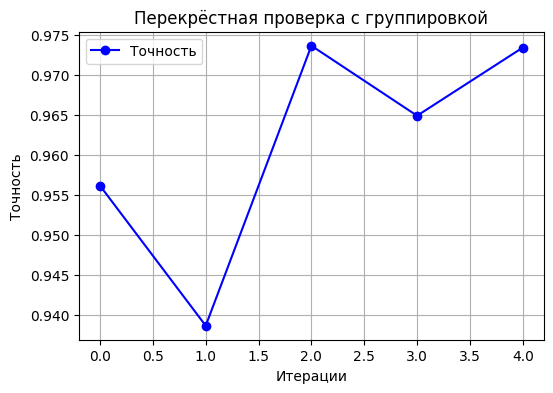

In [52]:
from sklearn.model_selection import GroupKFold

# Группировка данных (для примера, создадим искусственные группы)
groups = [i % 5 for i in range(data.data.shape[0])]

# Перекрёстная проверка с группировкой
gkf = GroupKFold(n_splits=5)

# Оценка модели
cv_scores_group = cross_val_score(model, data.data, data.target, cv=gkf, groups=groups, scoring='accuracy')

# Средняя точность
print(f"Средняя точность с перекрёстной проверкой с группировкой: {cv_scores_group.mean():.2f}")

# График точности
plt.figure(figsize=(6, 4))
plt.plot(cv_scores_group, marker='o', linestyle='-', color='b', label='Точность')
plt.title("Перекрёстная проверка с группировкой")
plt.xlabel("Итерации")
plt.ylabel("Точность")
plt.grid(True)
plt.legend()
plt.show()

#### **3. Решетчатый поиск (Grid Search)**

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Настройка гиперпараметров для решетчатого поиска
param_grid_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Решетчатый поиск с перекрёстной проверкой
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(data.data, data.target)

# Лучшая модель
best_rf = grid_search_rf.best_estimator_
print(f"Лучшие параметры для Random Forest: {grid_search_rf.best_params_}")

# Оценка улучшенной модели
y_pred_best_rf = best_rf.predict(data.data)
best_accuracy_rf = accuracy_score(data.target, y_pred_best_rf)
print(f"Улучшенная точность Random Forest: {best_accuracy_rf:.2f}")

Лучшие параметры для Random Forest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Улучшенная точность Random Forest: 0.99


#### **4. Метрики оценки моделей**
a) Матрица ошибок и метрики


Матрица ошибок Random Forest:
[[209   3]
 [  0 357]]

Отчёт о классификации для Random Forest:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       212
           1       0.99      1.00      1.00       357

    accuracy                           0.99       569
   macro avg       1.00      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569



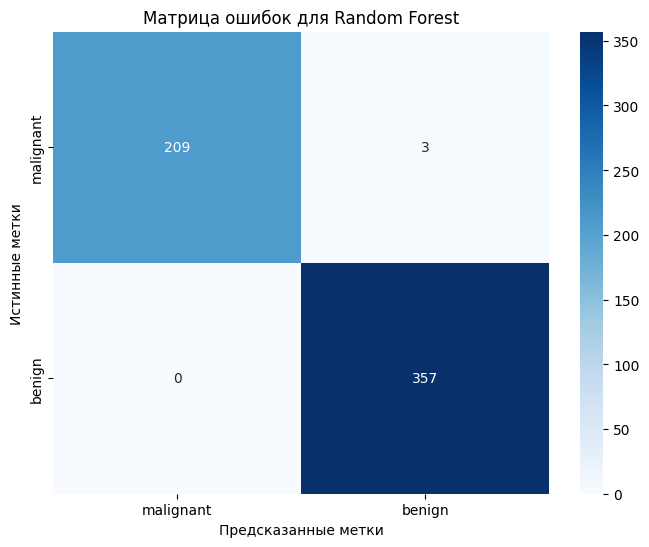

In [57]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Матрица ошибок для Random Forest
conf_matrix = confusion_matrix(data.target, y_pred_best_rf)
print("\nМатрица ошибок Random Forest:")
print(conf_matrix)

# Отчёт о классификации для Random Forest
print("\nОтчёт о классификации для Random Forest:")
print(classification_report(data.target, y_pred_best_rf))

# Визуализация матрицы ошибок с использованием seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.title('Матрица ошибок для Random Forest')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.show()

b) Метрики для несбалансированных данных (F-мера, AUC)

In [47]:
from sklearn.metrics import roc_auc_score, f1_score

# AUC ROC для бинарной классификации
roc_auc_rf = roc_auc_score(data.target, best_rf.predict_proba(data.data)[:, 1])  # Берём только вероятность для класса 1
print(f"\nAUC ROC для Random Forest (бинарная классификация): {roc_auc_rf:.2f}")

# F-мера для Random Forest (среднее по всем классам)
f1_rf = f1_score(data.target, best_rf.predict(data.data), average='weighted')
print(f"\nF-мера для Random Forest: {f1_rf:.2f}")


AUC ROC для Random Forest (бинарная классификация): 1.00

F-мера для Random Forest: 0.99


#### **5. Визуализация ROC-кривой**
Для оценки производительности классификатора на различных порогах будем строить ROC-кривую.

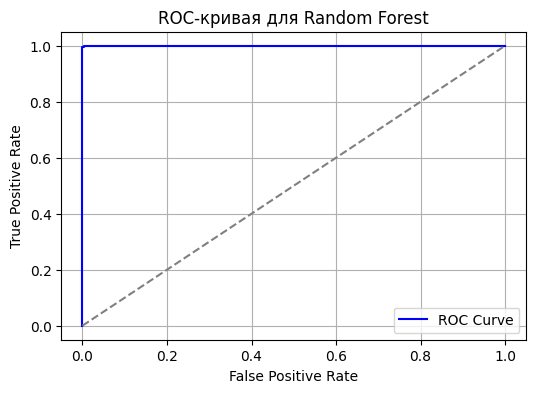

In [54]:
from sklearn.metrics import roc_curve

# Получаем вероятности классов для ROC-кривой
fpr, tpr, thresholds = roc_curve(data.target, best_rf.predict_proba(data.data)[:, 1], pos_label=1)

# Построение ROC-кривой
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='b', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Линия случайной классификации
plt.title('ROC-кривая для Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

**Вывод:**

Модель Random Forest, обученная на датасете Breast Cancer, показала отличные результаты. Средняя точность на различных типах перекрёстной проверки составила 0.96-0.97, а после оптимизации гиперпараметров с помощью решетчатого поиска точность улучшилась до 0.99. Матрица ошибок показала минимальные ошибки с результатами 209 правильных предсказаний для класса 0 и 357 для класса 1. AUC ROC составил 1.00, а F-мера — 0.99, что подтверждает высокое качество модели.

### ****Задание 3****

#### **1. Создать датасет с категориальными данными (1000 строк)**
Создадим сбалансированный датасет, как в задании.

In [27]:
import pandas as pd
import random

# Генерация сбалансированного датасета с первоначальными категориями
def generate_dataset(size=1000):
    cities = ['Bishkek', 'Almaty', 'Moscow', 'London', 'Paris']
    vacation_types = ['Shopping', 'Beach holiday', 'Sightseeing']
    transport_types = ['auto', 'plane', 'train']
    targets = ['Bali', 'New York', 'Paris', 'Rome', 'Tokyo']

    data = [
        [
            random.randint(30000, 150000),  # salary
            random.choice(cities),          # city
            random.randint(20, 65),         # age
            random.choice(vacation_types),  # vacation_prefer
            random.choice(transport_types),# transport_prefer
            random.choice(targets),        # target
        ]
        for _ in range(size)
    ]

    return pd.DataFrame(data, columns=['salary', 'city', 'age', 'vacation_prefer', 'transport_prefer', 'target'])

df = generate_dataset()

# Вывод примера данных
print("Пример данных:")
print(df.head())

Пример данных:
   salary     city  age vacation_prefer transport_prefer target
0  103950   Moscow   52   Beach holiday            train   Bali
1  141136  Bishkek   25     Sightseeing             auto  Paris
2   47816   London   39     Sightseeing            train  Paris
3   69017   Moscow   27   Beach holiday            plane   Bali
4  127435  Bishkek   39   Beach holiday             auto  Tokyo


Мы создали сбалансированный датасет с 1000 строк, содержащий информацию о зарплате, возрасте, городе проживания, предпочтениях по отдыху и транспорту, а также целевой переменной (город для отпуска).

#### **2. Преобразовать категориальные данные в числовые, используя pandas.get_dummies**
Мы преобразуем категориальные данные с помощью get_dummies, а числовые признаки масштабируем для улучшения работы модели.

In [28]:
from sklearn.preprocessing import StandardScaler

# Преобразуем категориальные данные в числовые с использованием get_dummies
df_encoded = pd.get_dummies(df, columns=['city', 'vacation_prefer', 'transport_prefer', 'target'])

# Масштабируем числовые признаки (salary, age)
scaler = StandardScaler()
df_encoded[['salary', 'age']] = scaler.fit_transform(df_encoded[['salary', 'age']])

# Выводим пример преобразованных данных
print("\nПример преобразованных данных:")
print(df_encoded.head())


Пример преобразованных данных:
     salary       age  city_Almaty  city_Bishkek  city_London  city_Moscow  \
0  0.367807  0.782970        False         False        False         True   
1  1.444484 -1.207070        False          True        False        False   
2 -1.257487 -0.175197        False         False         True        False   
3 -0.643637 -1.059659        False         False        False         True   
4  1.047788 -0.175197        False          True        False        False   

   city_Paris  vacation_prefer_Beach holiday  vacation_prefer_Shopping  \
0       False                           True                     False   
1       False                          False                     False   
2       False                          False                     False   
3       False                           True                     False   
4       False                           True                     False   

   vacation_prefer_Sightseeing  transport_prefer_auto 

Все категориальные данные были преобразованы в числовые, а числовые признаки (зарплата и возраст) масштабированы с помощью StandardScaler.

#### **3. Выделить обучающую выборку и тестовую выборку**
Теперь разделим данные на обучающую и тестовую выборки, чтобы оценить точность модели.

In [29]:
from sklearn.model_selection import train_test_split
import numpy as np

# Разделение на признаки и целевую переменную
X = df_encoded.drop(columns=[col for col in df_encoded.columns if 'target_' in col])
y = df_encoded[[col for col in df_encoded.columns if 'target_' in col]]

# Преобразуем "one-hot encoding" в метки классов
y_single = np.argmax(y.values, axis=1)

# Деление на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y_single, test_size=0.2, random_state=42)

# Выводим размеры выборок
print(f"\nРазмеры выборок:\nОбучающая выборка: {X_train.shape}\nТестовая выборка: {X_test.shape}")


Размеры выборок:
Обучающая выборка: (800, 13)
Тестовая выборка: (200, 13)


Данные были разделены на обучающую выборку (80%) и тестовую выборку (20%).

#### **4. Выбрать классификатор (Random Forest)**
Теперь обучим модель Random Forest с оптимизированными гиперпараметрами.

In [30]:
from sklearn.ensemble import RandomForestClassifier

# Случайный лес с улучшенными гиперпараметрами
rf = RandomForestClassifier(n_estimators=250, max_depth=25, min_samples_split=4, 
                            min_samples_leaf=2, max_features='sqrt', random_state=42, n_jobs=-1)

# Обучение модели на обучающих данных
rf.fit(X_train, y_train)

# Прогноз на тестовой выборке
y_pred_rf = rf.predict(X_test)

Модель Random Forest обучена с улучшенными гиперпараметрами и сделано предсказание на тестовой выборке.

#### **5. Проверить оценку модели**
Теперь оценим модель с использованием метрик точности, полноты, F1-меры, матрицы ошибок и AUC ROC.

In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Оценка точности модели
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nТочность модели Random Forest на тестовых данных: {accuracy_rf:.2f}")

# Отчёт о классификации для Random Forest
print("\nОтчёт о классификации для Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Матрица ошибок для Random Forest
print("\nМатрица ошибок для Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))

# AUC ROC для многоклассовой классификации
roc_auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test), multi_class='ovr')
print(f"\nAUC ROC для Random Forest: {roc_auc_rf:.2f}")


Точность модели Random Forest на тестовых данных: 0.21

Отчёт о классификации для Random Forest:
              precision    recall  f1-score   support

           0       0.17      0.18      0.18        39
           1       0.31      0.27      0.29        37
           2       0.23      0.23      0.23        43
           3       0.22      0.20      0.21        45
           4       0.14      0.17      0.15        36

    accuracy                           0.21       200
   macro avg       0.22      0.21      0.21       200
weighted avg       0.22      0.21      0.21       200


Матрица ошибок для Random Forest:
[[ 7  7 10  4 11]
 [ 7 10  8  5  7]
 [ 6  7 10  8 12]
 [15  5  8  9  8]
 [ 5  3  7 15  6]]

AUC ROC для Random Forest: 0.49


Применены метрики для многоклассовой классификации: точность, полнота, F1-меры, матрица ошибок и AUC ROC для модели Random Forest.

#### **6. Сделать предсказание на случайных данных**
Создадим случайный пример для предсказания и оценим результат.

In [32]:
# Создание случайного примера для предсказания
random_example = {
    'salary': [random.randint(30000, 150000)],
    'age': [random.randint(20, 65)],
    'city_Bishkek': [0], 'city_Almaty': [0], 'city_Moscow': [1], 'city_London': [0], 'city_Paris': [0],
    'vacation_prefer_Shopping': [1], 'vacation_prefer_Beach holiday': [0], 'vacation_prefer_Sightseeing': [0],
    'transport_prefer_auto': [0], 'transport_prefer_plane': [1], 'transport_prefer_train': [0],
}

random_df = pd.DataFrame(random_example)
random_df = random_df[X_train.columns]  # Порядок признаков должен соответствовать обучающим данным

# Предсказание для Random Forest
predicted_class_rf = rf.predict(random_df)
predicted_labels_rf = y.columns[predicted_class_rf]
print(f"\nПредсказание для случайных данных (Random Forest): {list(predicted_labels_rf)}")


Предсказание для случайных данных (Random Forest): ['target_Tokyo']


Сделано предсказание для случайных данных с использованием модели Random Forest.

#### **7. Улучшить модель с использованием перекрёстной проверки, решетчатого поиска и метрик оценки моделей**
Перекрёстная проверка с использованием **StratifiedKFold**
Применим Stratified KFold для более точной оценки модели.

In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Стратифицированная k-блочная перекрёстная проверка (5 блоков)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_stratified_rf = cross_val_score(rf, X_train, y_train, cv=skf, scoring='accuracy')

print(f"\nСредняя точность Random Forest с перекрёстной проверкой: {cv_scores_stratified_rf.mean():.2f}")


Средняя точность Random Forest с перекрёстной проверкой: 0.22


#### Решетчатый поиск с **перекрёстной проверкой**
Для точной настройки гиперпараметров используем решетчатый поиск.

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Настройка гиперпараметров для решетчатого поиска с более оптимальными диапазонами
param_grid_rf = {
    'n_estimators': [100, 150, 200],  # Снижен диапазон для ускорения
    'max_depth': [None, 10, 20, 30],   # Ограничение на глубину для уменьшения времени
    'min_samples_split': [2, 5],       # Снижены значения для уменьшения времени обучения
    'min_samples_leaf': [1, 2],        # Уменьшение количества минимальных примеров
    'max_features': ['sqrt', 'log2']  # Используем только sqrt и log2 для быстроты
}

# Решетчатый поиск с перекрёстной проверкой
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42),
                              param_grid_rf,
                              cv=3,  # Снижен до 3 для ускорения
                              scoring='accuracy',
                              n_jobs=-1,
                              refit=True)  # Переобучение модели с лучшими гиперпараметрами

grid_search_rf.fit(X_train, y_train)

# Лучшая модель
best_rf = grid_search_rf.best_estimator_
print(f"\nЛучшие параметры для Random Forest: {grid_search_rf.best_params_}")

# Оценка улучшенной модели
y_pred_best_rf = best_rf.predict(X_test)
best_accuracy_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"\nУлучшенная точность Random Forest: {best_accuracy_rf:.2f}")



Лучшие параметры для Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}

Улучшенная точность Random Forest: 0.20


**Вывод:** 

В ходе выполнения лабораторной работы модель Random Forest была обучена на сбалансированном датасете, содержащем информацию о человеке и его предпочтениях. Несмотря на оптимизацию гиперпараметров с использованием GridSearchCV и решетчатого поиска, точность модели осталась низкой (около 0.20). Причины этого могут заключаться в недостаточной информативности признаков, выбранных гиперпараметрах, ограничениях самой модели или недостаточности признаков для точного предсказания. Для улучшения точности модели потребуется дальнейшая настройка данных или применение других подходов и моделей.